In [ ]:
!pip3 install requests
!pip3 install beautifulsoup4
!pip3 install lxml
!pip3 install pandas
!pip3 install matplotlib
!pip3 install seaborn


# Web scraping

In [1]:
url = 'https://www.worldometers.info/coronavirus/'
import requests
content = requests.get(url).content #used to pull html data

In [ ]:
content

In [2]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(content, "html.parser") 

In [4]:
tbody = soup.find("tbody")


<!DOCTYPE html>

<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID - Coronavirus Statistics - Worldometer</title>
<meta content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates." name="description"/>
<!-- Favicon -->
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
<link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
<link href="/favicon/apple-icon-76x76.png" rel="apple-touch-icon
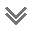

In [9]:
soup

In [5]:
table_row = tbody.find_all("tr")

In [8]:
table_row[8]

<tr style="">
<td style="font-size:12px;color: grey;text-align:center;vertical-align:middle;">1</td>
<td style="font-weight: bold; font-size:15px; text-align:left;"><a class="mt_a" href="country/us/">USA</a></td>
<td style="font-weight: bold; text-align:right">106,791,968</td>
<td style="font-weight: bold; text-align:right;"></td>
<td style="font-weight: bold; text-align:right;">1,162,699                                </td>
<td style="font-weight: bold; 
                                    text-align:right;"></td>
<td style="font-weight: bold; text-align:right">104,769,891</td>
<td style="font-weight: bold; text-align:right;"></td>
<td style="text-align:right;font-weight:bold;">859,378</td>
<td style="font-weight: bold; text-align:right">1,152</td>
<td style="font-weight: bold; text-align:right">318,967</td>
<td style="font-weight: bold; text-align:right">3,473</td>
<td style="font-weight: bold; text-align:right">1,179,087,242</td>
<td style="font-weight: bold; text-align:right">3,521

In [55]:
all_data = []
for row in range(8, len(table_row)):
    cd = []
    country_data = table_row[row].find_all("td")
    for item in country_data:
        print(item.text)
        cd.append(item.text)
    all_data.append(cd)

1
USA
106,791,968

1,162,699                                

104,769,891

859,378
1,152
318,967
3,473
1,179,087,242
3,521,711
334,805,269 
North America
3
288
0


2,567
2
India
44,979,402

531,767                                

44,431,137

16,498
N/A
31,977
378
928,487,923
660,079
1,406,631,776 
Asia
31
2,645
2


12
3
France
40,042,410

166,970                                

39,783,277

92,163
869
610,547
2,546
271,490,188
4,139,547
65,584,518 
Europe
2
393
0


1,405
4
Germany
38,417,622

173,797                                

38,217,000

26,825
N/A
457,987
2,072
122,332,384
1,458,359
83,883,596 
Europe
2
483
1


320
5
Brazil
37,511,921

702,116                                

36,249,161

560,644
N/A
174,188
3,260
63,776,166
296,146
215,353,593 
South America
6
307
3


2,603
6
Japan
33,803,572

74,694                                

N/A
N/A
N/A
83
269,169
595
100,414,883
799,578
125,584,838 
Asia
4
1,681
1


95,582
7
S. Korea
31,390,699

34,597                                


In [12]:
print(all_data)

[['1', 'USA', '106,791,968', '', '1,162,699                                ', '', '104,769,891', '', '859,378', '1,152', '318,967', '3,473', '1,179,087,242', '3,521,711', '334,805,269 ', 'North America', '3', '288', '0', '', '', '2,567'], ['2', 'India', '44,979,402', '', '531,767                                ', '', '44,431,137', '', '16,498', 'N/A', '31,977', '378', '928,487,923', '660,079', '1,406,631,776 ', 'Asia', '31', '2,645', '2', '', '', '12'], ['3', 'France', '40,042,410', '', '166,970                                ', '', '39,783,277', '', '92,163', '869', '610,547', '2,546', '271,490,188', '4,139,547', '65,584,518 ', 'Europe', '2', '393', '0', '', '', '1,405'], ['4', 'Germany', '38,417,622', '', '173,797                                ', '', '38,217,000', '', '26,825', 'N/A', '457,987', '2,072', '122,332,384', '1,458,359', '83,883,596 ', 'Europe', '2', '483', '1', '', '', '320'], ['5', 'Brazil', '37,511,921', '', '702,116                                ', '', '36,249,161', 

In [14]:
import pandas as pd
pd.DataFrame(all_data)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1,USA,"106,791,968",,"1,162,699",,"104,769,891",,"859,378","1,152",...,"1,179,087,242","3,521,711","334,805,269",North America,3,288,0,,,"2,567"
1,2,India,"44,979,402",,"531,767",,"44,431,137",,"16,498",N/A,...,"928,487,923","660,079","1,406,631,776",Asia,31,"2,645",2,,,12
2,3,France,"40,042,410",,"166,970",,"39,783,277",,"92,163",869,...,"271,490,188","4,139,547","65,584,518",Europe,2,393,0,,,"1,405"
3,4,Germany,"38,417,622",,"173,797",,"38,217,000",,"26,825",N/A,...,"122,332,384","1,458,359","83,883,596",Europe,2,483,1,,,320
4,5,Brazil,"37,511,921",,"702,116",,"36,249,161",,"560,644",N/A,...,"63,776,166","296,146","215,353,593",South America,6,307,3,,,"2,603"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,227,Vatican City,29,,,,29,,0,,...,,,799,Europe,28,,,,,
227,228,Western Sahara,10,,1,,9,,0,,...,,,"626,161",Africa,"62,616","626,161",,,,
228,229,MS Zaandam,9,,2,,7,,0,,...,,,,,,,,,,
229,230,Tokelau,5,,,,,,5,,...,,,"1,378",Australia/Oceania,276,,,,,"3,628"


In [19]:
data = list(map(lambda x : x[1:6], all_data))

In [24]:
columns = ["Country", "TotalCases", "NewCases", "TotalDeaths", "NewDeaths"]
df = pd.DataFrame(data, columns = columns) #this is done to only select required data
df

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths
0,USA,"106,791,968",,"1,162,699",
1,India,"44,979,402",,"531,767",
2,France,"40,042,410",,"166,970",
3,Germany,"38,417,622",,"173,797",
4,Brazil,"37,511,921",,"702,116",
...,...,...,...,...,...
226,Vatican City,29,,,
227,Western Sahara,10,,1,
228,MS Zaandam,9,,2,
229,Tokelau,5,,,


In [26]:
df.to_csv("covid.may13.csv", index = False) #csv are comma seperated values

In [27]:
df = pd.read_csv("covid.may13.csv")

In [28]:
df.head() #First 5 rows

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths
0,USA,"106,791,968",NaN,"1,162,699",NaN
1,India,"44,979,402",NaN,"531,767",NaN
2,France,"40,042,410",NaN,"166,970",NaN
3,Germany,"38,417,622",NaN,"173,797",NaN
4,Brazil,"37,511,921",NaN,"702,116",NaN


In [31]:
df.tail() # last 5 rows

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths
226,Vatican City,29,NaN,,NaN
227,Western Sahara,10,NaN,1,NaN
228,MS Zaandam,9,NaN,2,NaN
229,Tokelau,5,NaN,,NaN
230,China,"503,302",NaN,"5,272",NaN


# NaN
NaN is a missing value

In [32]:
#how to know if the data has missing value? using isna() method

In [33]:
df.isna()

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths
0,False,False,True,False,True
1,False,False,True,False,True
2,False,False,True,False,True
3,False,False,True,False,True
4,False,False,True,False,True
...,...,...,...,...,...
226,False,False,True,False,True
227,False,False,True,False,True
228,False,False,True,False,True
229,False,False,True,False,True


In [36]:
True + True # in binary, 1 + 1 : True is 1 and False is 0

2

In [37]:
False + False

0

In [38]:
False + False

0

In [39]:
# to find the number of missing data
df.isna().sum()

Country          0
TotalCases       0
NewCases       231
TotalDeaths      0
NewDeaths      231
dtype: int64

<Axes: >

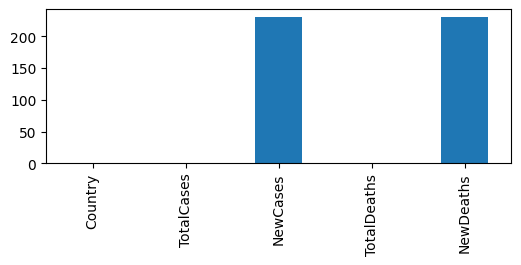

In [40]:
# I want a barchart to view data then
df.isna().sum().plot.bar(figsize = (6, 2))

In [41]:
df.isna().transpose()

,0,1,2,3,4,5,6,7,8,9,...,221,222,223,224,225,226,227,228,229,230
Country,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
TotalCases,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
NewCases,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
TotalDeaths,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
NewDeaths,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


<Axes: >

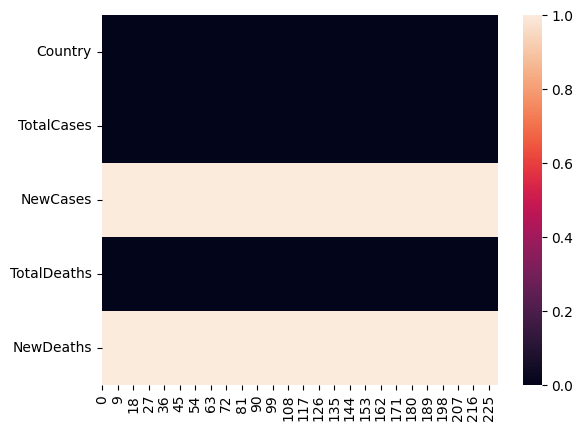

In [42]:
import seaborn as sns
sns.heatmap(df.isna().transpose())

<Axes: >

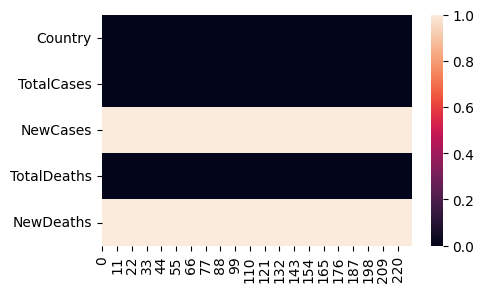

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize = (5, 3))
sns.heatmap(df.isna().transpose())

In [47]:
df['Country'] # selecting columns in pandas dataframe

0                 USA
1               India
2              France
3             Germany
4              Brazil
            ...      
226      Vatican City
227    Western Sahara
228        MS Zaandam
229           Tokelau
230             China
Name: Country, Length: 231, dtype: object

In [48]:
df["Country"] == "India"

0      False
1       True
2      False
3      False
4      False
       ...  
226    False
227    False
228    False
229    False
230    False
Name: Country, Length: 231, dtype: bool

In [49]:
df.loc[df["Country"] == "India"]

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths
1,India,"44,979,402",NaN,"531,767",NaN


In [50]:
df.loc[df["Country"] == "Nepal"]

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths
72,Nepal,"1,003,216",NaN,"12,031",NaN


In [51]:
!pip3 install html5lib


     |████████████████████████████████| 112 kB 721 kB/s eta 0:00:01
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.
